# Chapter 3: Beginning Data Analysis

## Recipes
* [3.1 Developing a data analysis routine](#3.1-Developing-a-data-analysis-routine)
* [3.2 Reducing memory by changing data types](#3.2-Reducing-memory-by-changing-data-types)
* [3.3 Selecting the smallest of the largest](#3.3-Selecting-the-smallest-of-the-largest)
* [3.4 Selecting the largest of each group by sorting](#3.4-Selecting-the-largest-of-each-group-by-sorting)
* [3.5 Duplicating nlargest with sort_values](#3.5-Duplicating-nlargest-with-sort_values)
* [3.6 Calculating a trailing stop order price](#3.6-Calculating-a-trailing-stop-order-price)
* [3.7 Chart plotting](#3.7-Chart-plotting)
* [3.8 Highlight](#3.8-Highlight)

In [25]:
import pandas as pd
import numpy as np


# 3.1 Developing a data analysis routine

In [26]:
### [Tech]  .head(),.shape, info(), .describe(include = 'number' | np.object),
### [Goal] 새로운 데이터셋의 메타데이터를 확인 -college

## >> How it works...

In [27]:
#3.1.1 첫 5줄
college = pd.read_csv('data/college.csv')
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [28]:
#3.1.2 크기 확인
college.shape

(7535, 27)

In [29]:
# 3.1.3 데이터 형식, 누락값 , 메모리 용량 확인
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 27 columns):
INSTNM                7535 non-null object
CITY                  7535 non-null object
STABBR                7535 non-null object
HBCU                  7164 non-null float64
MENONLY               7164 non-null float64
WOMENONLY             7164 non-null float64
RELAFFIL              7535 non-null int64
SATVRMID              1185 non-null float64
SATMTMID              1196 non-null float64
DISTANCEONLY          7164 non-null float64
UGDS                  6874 non-null float64
UGDS_WHITE            6874 non-null float64
UGDS_BLACK            6874 non-null float64
UGDS_HISP             6874 non-null float64
UGDS_ASIAN            6874 non-null float64
UGDS_AIAN             6874 non-null float64
UGDS_NHPI             6874 non-null float64
UGDS_2MOR             6874 non-null float64
UGDS_NRA              6874 non-null float64
UGDS_UNKN             6874 non-null float64
PPTUG_EF          

In [30]:
# 3.1.4 수치형 데이터 요약 통계량
college.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [31]:
# 3.1.5 범주형, 문자형
college.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
INSTNM,7535,7535,Kent State University at Geauga,1
CITY,7535,2514,New York,87
STABBR,7535,59,CA,773
MD_EARN_WNE_P10,6413,598,PrivacySuppressed,822
GRAD_DEBT_MDN_SUPP,7503,2038,PrivacySuppressed,1510


## >> There's more... 3.1

In [32]:
pd.read_csv('data/college_data_dictionary.csv')

,column_name,description
0,INSTNM,Institution Name
1,CITY,City Location
2,STABBR,State Abbreviation
3,HBCU,Historically Black College or University
4,MENONLY,0/1 Men Only
5,WOMENONLY,0/1 Women only
6,RELAFFIL,0/1 Religious Affiliation
7,SATVRMID,SAT Verbal Median
8,SATMTMID,SAT Math Median
9,DISTANCEONLY,Distance Education Only


# 3.2 Reducing memory by changing data types

In [33]:
### [Tech] 메모리 사용량 확인, 형변환 수행 (카테고리 데이터화)
### [Goal] college 데이터셋의 메모리 절감 등

## >> How it works...

In [34]:
# 3.2.1 메모리 절감 효과가 기대되는 컬럼의 선택
college= pd.read_csv('data/college.csv')
different_cols = ['RELAFFIL', 'SATMTMID', 'CURROPER', 'INSTNM','STABBR']
col2 = college[different_cols]
col2.head()

,RELAFFIL,SATMTMID,CURROPER,INSTNM,STABBR
0,0,420.0,1,Alabama A & M University,AL
1,0,565.0,1,University of Alabama at Birmingham,AL
2,1,NaN,1,Amridge University,AL
3,0,590.0,1,University of Alabama in Huntsville,AL
4,0,430.0,1,Alabama State University,AL


In [35]:
# 3.2.2 데이터 형 확인
col2.dtypes

RELAFFIL      int64
SATMTMID    float64
CURROPER      int64
INSTNM       object
STABBR       object
dtype: object

In [36]:
# 3.2.3 메모리 사용량 확인
original_mem = col2.memory_usage(deep=True)
original_mem


Index          128
RELAFFIL     60280
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

In [37]:
# 3.2.3 메모리 사용량 확인
original_mem = col2.memory_usage(deep=False)
original_mem


Index         128
RELAFFIL    60280
SATMTMID    60280
CURROPER    60280
INSTNM      60280
STABBR      60280
dtype: int64

In [13]:
# 3.2.4 데이터 형변환 (int64 -> int8)
col2.loc[:,'RELAFFIL'] = col2['RELAFFIL'].astype(np.int8)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
# 3.2.5 RELAFFIL형변환 결과 확인
col2.dtypes

RELAFFIL       int8
SATMTMID    float64
CURROPER      int64
INSTNM       object
STABBR       object
dtype: object

In [15]:
# 3.2.6 RELAFFIL 메모리 절감 확인
col2.memory_usage(deep=True)

Index          128
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

In [16]:
# 3.2.7 범주형 변환 대상을  nunique()로 확인 의 확인 
col2.select_dtypes(include=['object']).nunique()

INSTNM    7535
STABBR      59
dtype: int64

In [17]:
# 3.2.8 STABBR 가 unique 한 항목수가 59개로 적절, category화하고 데이터 형  확인
col2.loc[:,'STABBR'] = col2['STABBR'].astype('category')
col2.dtypes

RELAFFIL        int8
SATMTMID     float64
CURROPER       int64
INSTNM        object
STABBR      category
dtype: object

In [18]:
# 3.2.9  메모리 사이즈 확인
new_mem = col2.memory_usage(deep=True)
new_mem

Index          128
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660699
STABBR       13576
dtype: int64

In [19]:
# 3.2.10  기존 대비 신규 메모리 사용량 ,  RELAFFIL은 1/4 , STABBR 는 3%
new_mem/original_mem

Index       1.000000
RELAFFIL    0.125000
SATMTMID    1.000000
CURROPER    1.000000
INSTNM      1.000695
STABBR      0.030538
dtype: float64

## >>There's more... 3.2

In [20]:
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index          128
CURROPER     60280
INSTNM      660699
dtype: int64

In [21]:
college.loc[0, 'CURROPER'] = 10000000
college.loc[0, 'INSTNM'] = college.loc[0, 'INSTNM'] + 'a'
# college.loc[1, 'INSTNM'] = college.loc[1, 'INSTNM'] + 'a'
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index          128
CURROPER     60280
INSTNM      660752
dtype: int64

In [22]:
college['MENONLY'].dtype

dtype('float64')

In [23]:
college['MENONLY'].astype('int8') # ValueError: Cannot convert non-finite values (NA or inf) to integer

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
college.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [39]:
college.describe(include=[np.int64, np.float64]).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [40]:
college.describe(include=['int', 'float']).T  # defaults to 64 bit int/floats

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000
UGDS_HISP,6874.0,0.161635,0.221854,0.0,0.027600,0.07140,0.198875,1.0000


In [41]:
college.describe(include=['number']).T  # also works as the default int/float are 64 bits

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


# 3.3 Selecting the smallest of the largest

In [42]:
### [Tech] .nlargest (), nsmallest()
### [Goal] 특정 컬럼의 Top N을 filter 하는 방식을 사용하여 데이터 항목값을 탐색
### 첨언 : nlargest() 는 .value_sort(columns, ascending= False ).head(N)과 동일하다. 
#          직관적인 활용을 위한 것

## >> How it works...

In [43]:
# 3.3.1 movie load
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie2.head()

,movie_title,imdb_score,budget
0,Avatar,7.9,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,300000000.0
2,Spectre,6.8,245000000.0
3,The Dark Knight Rises,8.5,250000000.0
4,Star Wars: Episode VII - The Force Awakens,7.1,NaN


In [46]:
movie2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 3 columns):
movie_title    4916 non-null object
imdb_score     4916 non-null float64
budget         4432 non-null float64
dtypes: float64(2), object(1)
memory usage: 115.3+ KB


In [58]:
# 3.3.2 imdb score 기준 Top 100
movie2.nlargest(100, 'imdb_score')

KeyError: 'budget'

In [50]:
movie2.sort_values(by = 'imdb_score', ascending = False).head(100)

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0
...,...,...,...
3799,Anne of Green Gables,8.4,NaN
3777,Requiem for a Dream,8.4,4500000.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,3500000.0
4636,The Other Dream Team,8.4,500000.0


In [45]:
# 3.3.3 imdb Top100 중에서 저예산 Top 5
movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


# 3.4 Selecting the largest of each group by sorting

In [52]:
### [Tech]  정렬후 drop_duplicates(subset = columns) 로 정리
### [Goal] 특정 컬럼을 범주로 한 그룹에서 최고/최소값 리스트 , 연도별 최고 평점 영화 목록

## >> How it works...

In [53]:
#3.4.1 movie 부분 집합
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title', 'title_year', 'imdb_score']]

In [54]:
# 3.4.2 연도별 내림차순 정렬
movie2.sort_values('title_year', ascending=False).head()

,movie_title,title_year,imdb_score
3884,The Veil,2016.0,4.7
2375,My Big Fat Greek Wedding 2,2016.0,6.1
2794,Miracles from Heaven,2016.0,6.8
92,Independence Day: Resurgence,2016.0,5.5
153,Kung Fu Panda 3,2016.0,7.2


In [55]:
# 3.4.3 연도별, 평점별 내림차순으로 정렬
movie3 = movie2.sort_values(['title_year','imdb_score'], ascending = False)
movie3.head()

,movie_title,title_year,imdb_score
4312,Kickboxer: Vengeance,2016.0,9.1
4277,A Beginner's Guide to Snuff,2016.0,8.7
3798,Airlift,2016.0,8.5
27,Captain America: Civil War,2016.0,8.2
98,Godzilla Resurgence,2016.0,8.2


In [56]:
# 3.4.4 연도별 각 첫 줄이 평점 최고점이므로 연도별 한 줄 씩만 남기고 중복된 값은 삭제한다
movie_top_year = movie3.drop_duplicates(subset='title_year')
movie_top_year.head()

,movie_title,title_year,imdb_score
4312,Kickboxer: Vengeance,2016.0,9.1
3745,Running Forever,2015.0,8.6
4369,Queen of the Mountains,2014.0,8.7
3935,"Batman: The Dark Knight Returns, Part 2",2013.0,8.4
3,The Dark Knight Rises,2012.0,8.5


## >> There's more... 3.4

In [63]:
movie4 = movie[['movie_title', 'title_year', 'content_rating', 'budget']]
movie4_sorted = movie4.sort_values(['title_year', 'content_rating', 'budget'], 
                                   ascending=[False, False, True])
movie4_sorted.head(100)

,movie_title,title_year,content_rating,budget
4026,Compadres,2016.0,R,3000000.0
3884,The Veil,2016.0,R,4000000.0
3682,Fifty Shades of Black,2016.0,R,5000000.0
3685,The Perfect Match,2016.0,R,5000000.0
3396,The Neon Demon,2016.0,R,7000000.0
...,...,...,...,...
2431,Restoration,2016.0,NaN,NaN
4277,A Beginner's Guide to Snuff,2016.0,NaN,NaN
4605,Irreplaceable,2016.0,NaN,NaN
4731,Bizarre,2015.0,Unrated,500000.0


In [57]:
movie4 = movie[['movie_title', 'title_year', 'content_rating', 'budget']]
movie4_sorted = movie4.sort_values(['title_year', 'content_rating', 'budget'], 
                                   ascending=[False, False, True])
movie4_sorted.drop_duplicates(subset=['title_year', 'content_rating']).head(10)

,movie_title,title_year,content_rating,budget
4026,Compadres,2016.0,R,3000000.0
4658,Fight to the Finish,2016.0,PG-13,150000.0
4661,Rodeo Girl,2016.0,PG,500000.0
3252,The Wailing,2016.0,Not Rated,NaN
4659,Alleluia! The Devil's Carnival,2016.0,NaN,500000.0
4731,Bizarre,2015.0,Unrated,500000.0
812,The Ridiculous 6,2015.0,TV-14,NaN
4831,The Gallows,2015.0,R,100000.0
4825,Romantic Schemer,2015.0,PG-13,125000.0
3796,R.L. Stine's Monsterville: The Cabinet of Souls,2015.0,PG,4400000.0


# 3.5 Duplicating nlargest with sort_values

In [64]:
### [Tech] .sort_values, .nlargest, drop_duplicate 등에서 동률일 때의 처리
### [Goal] .sort_values를 사용하여 nlargest와 동일하게 작동하게 함. 동률일 경우의 처리

## >> How it works...

In [65]:
# 3.5.1 sort_values에서 구현한 값과의 비교를 위해서 nlargest로 구현
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie_smallest_largest = movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')
movie_smallest_largest

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


In [66]:
# 3.5.2 sort_values + head() 로 평점 top 100
movie2.sort_values('imdb_score', ascending=False).head(100).head()

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0


In [67]:
# 3.5.3 sort_values + head() 로 평점 top 100에 저엔산 top5를 구한다
movie2.sort_values('imdb_score', ascending=False).head(100).sort_values('budget').head()

,movie_title,imdb_score,budget
4815,A Charlie Brown Christmas,8.4,150000.0
4801,Children of Heaven,8.5,180000.0
4804,Butterfly Girl,8.7,180000.0
4706,12 Angry Men,8.9,350000.0
4636,The Other Dream Team,8.4,500000.0


## >> There's more... 3.5

In [68]:
# nlargest top 100의 경계선 
movie2.nlargest(100, 'imdb_score').tail()

,movie_title,imdb_score,budget
4023,Oldboy,8.4,3000000.0
4163,To Kill a Mockingbird,8.4,2000000.0
4395,Reservoir Dogs,8.4,1200000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


In [69]:
# sort_values top 100의 경계선
movie2.sort_values('imdb_score', ascending=False).head(100).tail()

,movie_title,imdb_score,budget
3799,Anne of Green Gables,8.4,NaN
3777,Requiem for a Dream,8.4,4500000.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,3500000.0
4636,The Other Dream Team,8.4,500000.0
2455,Aliens,8.4,18500000.0


In [70]:
# 해결 하려면 동률의 경우를 포함 시킴  : nlargest
movie2.nlargest(100, 'imdb_score', keep='all').nsmallest(5, 'budget', keep='all')

,movie_title,imdb_score,budget
4815,A Charlie Brown Christmas,8.4,150000.0
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


# 3.6 Calculating a trailing stop order price

In [ ]:
### [Tech] .cummax() , datareader
### [Goal] tesla 주가를 이용 과거 최고가의 90% 가 되면 매각 추천

## >> How it works...

In [71]:
# 3.6.1 2017년 이후 tsla data를 읽어 들임
import pandas_datareader as pdr
tsla = pdr.DataReader('tsla', data_source='yahoo',start='2017-1-1')
tsla.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001
2017-01-10,46.400002,45.377998,46.400002,45.973999,18300000.0,45.973999
2017-01-11,45.995998,45.335999,45.813999,45.945999,18254000.0,45.945999
2017-01-12,46.139999,45.116001,45.812000,45.917999,18951000.0,45.917999


In [76]:
# 3.6.2 종가 기준
tsla_close = tsla['Close']
tsla_close.head(10)

Date
2017-01-03    43.397999
2017-01-04    45.397999
2017-01-05    45.349998
2017-01-06    45.801998
2017-01-09    46.256001
2017-01-10    45.973999
2017-01-11    45.945999
2017-01-12    45.917999
2017-01-13    47.549999
2017-01-17    47.116001
Name: Close, dtype: float64

In [74]:
# 3.6.3 최근일 까지의 누적 최대 종가
tsla_cummax = tsla_close.cummax()
tsla_cummax.head(8)

Date
2017-01-03    43.397999
2017-01-04    45.397999
2017-01-05    45.397999
2017-01-06    45.801998
2017-01-09    46.256001
2017-01-10    46.256001
2017-01-11    46.256001
2017-01-12    46.256001
Name: Close, dtype: float64

In [75]:
# 3.6.4 추적 지적 주문가의 설정
tsla_trailing_stop = tsla_cummax * .9
tsla_trailing_stop.head(8)

Date
2017-01-03    39.058199
2017-01-04    40.858199
2017-01-05    40.858199
2017-01-06    41.221798
2017-01-09    41.630400
2017-01-10    41.630400
2017-01-11    41.630400
2017-01-12    41.630400
Name: Close, dtype: float64

## >> There's more... 3.6

In [77]:
# 함수화
def set_trailing_loss(symbol, purchase_date, perc):
    close = pdr.DataReader(symbol, 'yahoo', start=purchase_date)['Close']
    return close.cummax() * perc

In [78]:
msft_trailing_stop = set_trailing_loss('msft', '2017-6-1', .85)
msft_trailing_stop.head()

Date
2017-05-31    59.363997
2017-06-01    59.584999
2017-06-02    60.996002
2017-06-05    61.437999
2017-06-06    61.641997
Name: Close, dtype: float64

In [79]:
msft_trailing_stop.tail()

Date
2020-09-08    196.902495
2020-09-09    196.902495
2020-09-10    196.902495
2020-09-11    196.902495
2020-09-14    196.902495
Name: Close, dtype: float64

# 3.7 Chart plotting

In [ ]:
### [Tech] df.plot (kind = 'line'|'bar'|'barh'|'box'), df.hist,
###        df.scatter(x=, y= ), sns.pairplot(df)
### [Goal] 기본이 되는 chart 출력 

## >> How it works...

In [81]:
%matplotlib inline
import pandas_datareader as pdr
tsla = pdr.DataReader('tsla', data_source='yahoo',start='2017-1-1')
tsla.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001
2017-01-10,46.400002,45.377998,46.400002,45.973999,18300000.0,45.973999
2017-01-11,45.995998,45.335999,45.813999,45.945999,18254000.0,45.945999
2017-01-12,46.139999,45.116001,45.812000,45.917999,18951000.0,45.917999


In [82]:
tsla.shape

(931, 6)

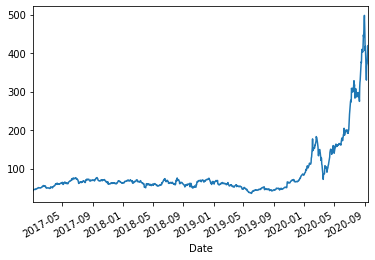

In [83]:
# 3.7.1 tsla 종가의 시계열 chart
tsla['Close'].plot(kind = 'line');

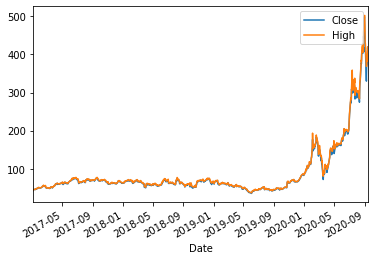

In [84]:
# 3.7.2 종가와 최고가의 시계열
tsla[['Close','High']].plot(kind= 'line');

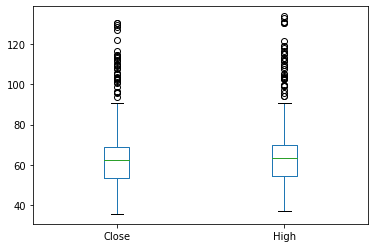

In [85]:
# 3.7.3 종가와 최고가의 box plot  (outlier 보정을 위해 종가 800개만 사용)
tsla[['Close','High']].nsmallest(800,'Close').plot(kind= 'box');

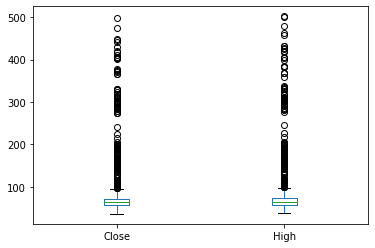

In [92]:
# 3.7.3 종가와 최고가의 box plot  (outlier 보정을 위해 종가 800개만 사용)
tsla[['Close','High']].plot(kind= 'box');

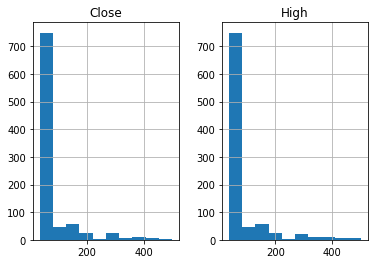

In [86]:
# 3.7.4 종가와 최고가의 histogram
tsla[['Close','High']].hist();

In [87]:
# 3.7.5 bar chart sample
val_dict = {'Seoul':[800,600,900],
             'Busan': [900, 500,870]}
index = ['grape','orange','apple']
fruit = pd.DataFrame(val_dict , index = index )
fruit

,Seoul,Busan
grape,800,900
orange,600,500
apple,900,870


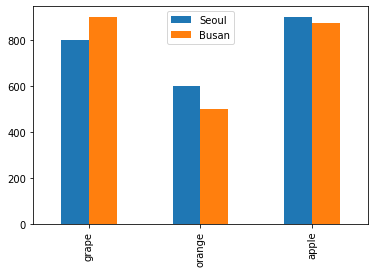

In [88]:
fruit.plot(kind = 'bar');

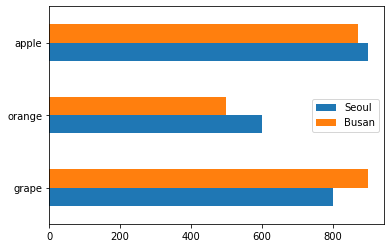

In [89]:
fruit.plot(kind = 'barh');

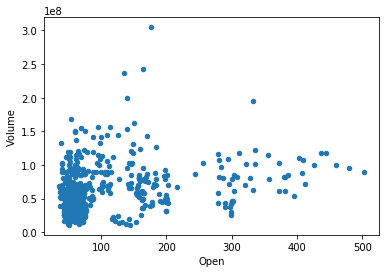

In [90]:
# 3.7.6 다시 tsla의 'Open'과 'Volume'의 scatter
tsla.plot.scatter(x = 'Open', y= 'Volume');

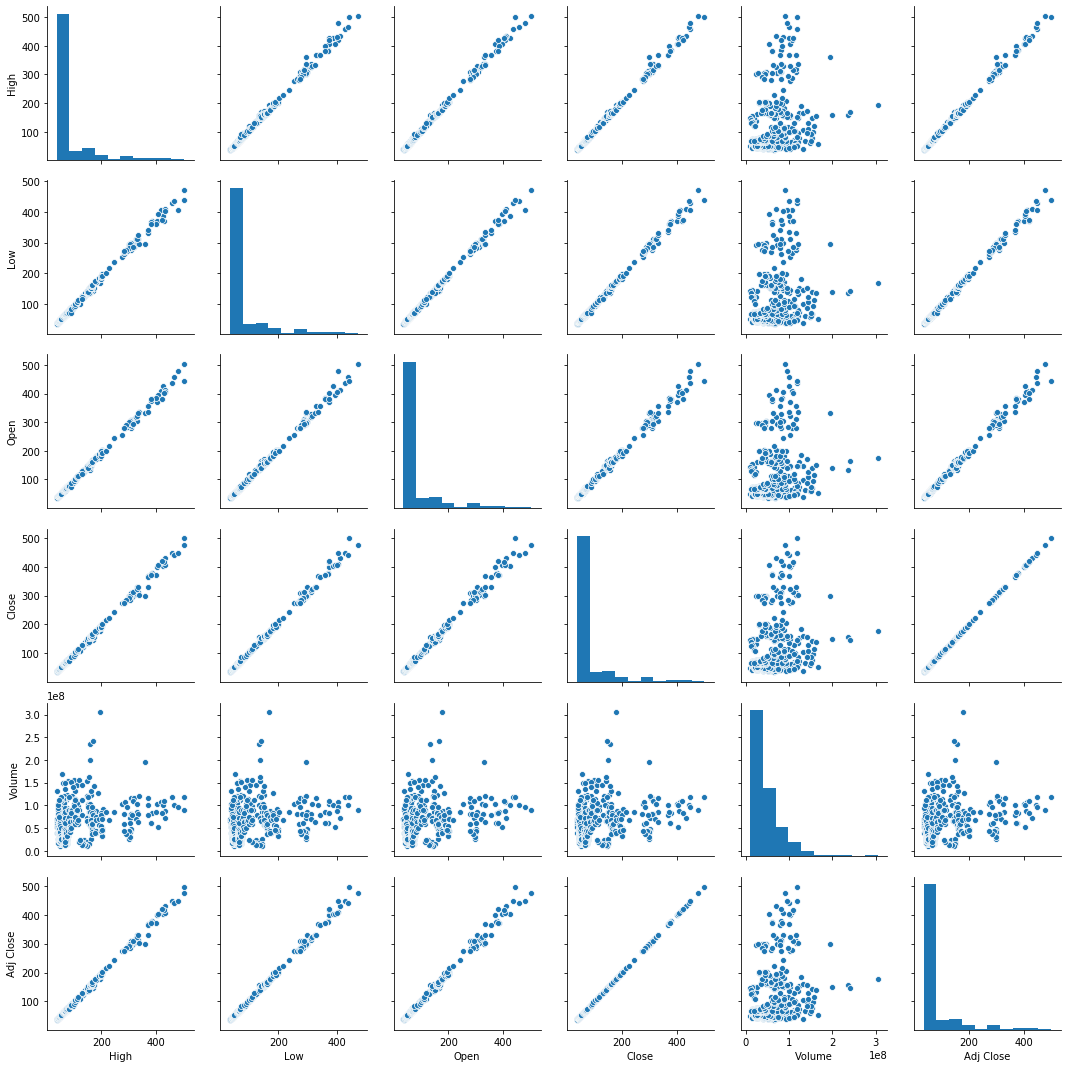

In [91]:
# 3.7.7 data frame 간의 관계를 일목요연하게 시각화 , seaborn은 pandas에서 method 제공 X
import seaborn as sns 
sns.pairplot (tsla);

# 3.8 Highlight 

In [93]:
### [Tech] df.style.highlight_max(subset = , color = , axis =)
### [Goal] DataFrame에 강조 포인트에 highlight

## >> How it works...

In [94]:
# 3.8.1 college의 요약 
college = pd.read_csv('data/college.csv')
col_desc = college.describe(include=[np.number]).T
col_desc

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [95]:
# 3.8.2 각 칼럼의 최대값 highlight
col_desc.style.highlight_max()

,count,mean,std,min,25%,50%,75%,max
HBCU,7164,0.0142379,0.118478,0,0,0,0,1
MENONLY,7164,0.00921273,0.0955465,0,0,0,0,1
WOMENONLY,7164,0.0053043,0.0726423,0,0,0,0,1
RELAFFIL,7535,0.190975,0.393096,0,0,0,0,1
SATVRMID,1185,522.819,68.5789,290,475,510,555,765
SATMTMID,1196,530.765,73.4698,310,482,520,565,785
DISTANCEONLY,7164,0.00558347,0.0745189,0,0,0,0,1
UGDS,6874,2356.84,5474.28,0,117,412.5,1929.5,151558
UGDS_WHITE,6874,0.510207,0.286958,0,0.2675,0.5557,0.747875,1
UGDS_BLACK,6874,0.189997,0.224587,0,0.036125,0.10005,0.2577,1


In [96]:
# 3.8.3 각 칼럼의 최대값 highlight한 상태에서 최소값에 회색
col_desc.style.highlight_max().highlight_min(color = 'lightgray')

,count,mean,std,min,25%,50%,75%,max
HBCU,7164,0.0142379,0.118478,0,0,0,0,1
MENONLY,7164,0.00921273,0.0955465,0,0,0,0,1
WOMENONLY,7164,0.0053043,0.0726423,0,0,0,0,1
RELAFFIL,7535,0.190975,0.393096,0,0,0,0,1
SATVRMID,1185,522.819,68.5789,290,475,510,555,765
SATMTMID,1196,530.765,73.4698,310,482,520,565,785
DISTANCEONLY,7164,0.00558347,0.0745189,0,0,0,0,1
UGDS,6874,2356.84,5474.28,0,117,412.5,1929.5,151558
UGDS_WHITE,6874,0.510207,0.286958,0,0.2675,0.5557,0.747875,1
UGDS_BLACK,6874,0.189997,0.224587,0,0.036125,0.10005,0.2577,1


In [97]:
# 3.8.4 행별로 mean과 50% 중 큰 값 강조
col_desc.style.highlight_max(subset = ['mean','50%'], axis = 'columns')

,count,mean,std,min,25%,50%,75%,max
HBCU,7164,0.0142379,0.118478,0,0,0,0,1
MENONLY,7164,0.00921273,0.0955465,0,0,0,0,1
WOMENONLY,7164,0.0053043,0.0726423,0,0,0,0,1
RELAFFIL,7535,0.190975,0.393096,0,0,0,0,1
SATVRMID,1185,522.819,68.5789,290,475,510,555,765
SATMTMID,1196,530.765,73.4698,310,482,520,565,785
DISTANCEONLY,7164,0.00558347,0.0745189,0,0,0,0,1
UGDS,6874,2356.84,5474.28,0,117,412.5,1929.5,151558
UGDS_WHITE,6874,0.510207,0.286958,0,0.2675,0.5557,0.747875,1
UGDS_BLACK,6874,0.189997,0.224587,0,0.036125,0.10005,0.2577,1
